In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('pima-indians-diabetes.csv', 
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by="pregnant", ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


In [7]:
print(df['age'].min())
print(df['age'].max())
# 20~480대 까지 정리하기 위해서 최대값과 최소값 추출

21
81


In [8]:
def new_age (x):
    if 20 <= x < 30 :
        return "20"
    elif 30 <= x < 40 :
        return "30"
    elif 40 <= x < 50 :
        return "40"
    elif 50 <= x < 60:
        return "50"
    elif 60 <= x < 70 :
        return "60"
    elif 70 <= x < 80:
        return "70"
    elif 80 <= x:
        return "80"

In [14]:
df["ages"] = df['age'].apply(new_age)

In [15]:
df["ages"] = df['age'].apply(new_age)
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class,ages
0,6,148,72,35,0,33.6,0.627,50,1,50
1,1,85,66,29,0,26.6,0.351,31,0,30
2,8,183,64,0,0,23.3,0.672,32,1,30
3,1,89,66,23,94,28.1,0.167,21,0,20
4,0,137,40,35,168,43.1,2.288,33,1,30
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60
764,2,122,70,27,0,36.8,0.340,27,0,20
765,5,121,72,23,112,26.2,0.245,30,0,30
766,1,126,60,0,0,30.1,0.349,47,1,40


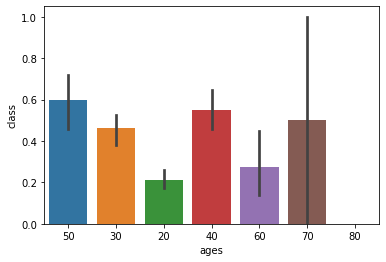

In [16]:
sns.barplot(x='ages',y='class', data=df)
plt.show()

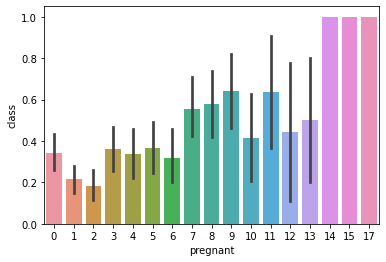

In [17]:
sns.barplot(x='pregnant',y='class', data=df)
plt.show()

In [18]:
df[['ages', 'class']].groupby(['ages'], as_index=False).mean().sort_values(by="ages", ascending=True)

,ages,class
0,20,0.212121
1,30,0.460606
2,40,0.550847
3,50,0.596491
4,60,0.275862
5,70,0.500000
6,80,0.000000


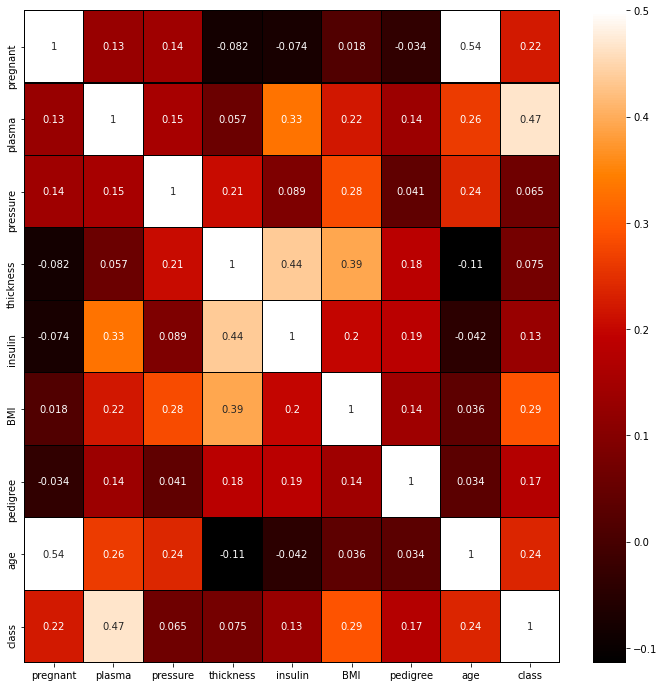

In [19]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(),linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='black', annot=True)
plt.show()

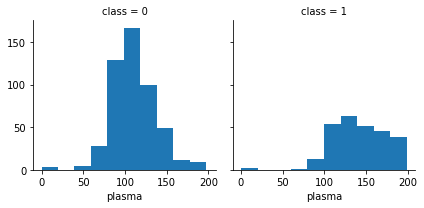

In [20]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

machine learning

In [21]:
y_target = df['class']
X_data = df.drop(['class'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.5, random_state=156)

df_clf = DecisionTreeClassifier(random_state =11)
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.6875


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(df_clf, X_data, y_target, scoring='accuracy', cv = 5)

print("교차 검증별 정확도", np.round(scores, 4))
print("평균 검증 정확도", np.round(np.mean(scores), 4))

교차 검증별 정확도 [0.6948 0.6818 0.6948 0.7778 0.7386]
평균 검증 정확도 0.7176


In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(df_clf, param_grid=parameters, cv=5, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 
           'split3_test_score', 'split4_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.734552,1,0.779221,0.675325,0.727273,0.688312,0.802632
1,"{'max_depth': 1, 'min_samples_split': 3}",0.734552,1,0.779221,0.675325,0.727273,0.688312,0.802632
2,"{'max_depth': 2, 'min_samples_split': 2}",0.729255,3,0.766234,0.701299,0.727273,0.688312,0.763158
3,"{'max_depth': 2, 'min_samples_split': 3}",0.729255,3,0.766234,0.701299,0.727273,0.688312,0.763158
4,"{'max_depth': 3, 'min_samples_split': 2}",0.718968,5,0.740260,0.675325,0.701299,0.675325,0.802632
5,"{'max_depth': 3, 'min_samples_split': 3}",0.718968,5,0.740260,0.675325,0.701299,0.675325,0.802632


In [24]:
print("최적 파라미터", grid_dtree.best_params_)
print("최고 정확도 {0:.4f}".format(grid_dtree.best_score_))

최적 파라미터 {'max_depth': 1, 'min_samples_split': 2}
최고 정확도 0.7346


Deep Learning

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

In [26]:
np.random.seed(3)
tf.random.set_seed(3)

In [27]:
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
x = dataset[:,0:8]
y = dataset[:,8]

In [28]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(x,y, epochs=200, batch_size=10)
print("/n Accuracy : %.4f" %model.evaluate(x,y)[1])

Epoch 1/200
77/77 [==============================] - 0s 762us/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 564us/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 587us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 577us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 543us/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 539us/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 591us/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 558us/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 574us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 617us/step - loss: 0.6656 - accur

77/77 [==============================] - 0s 630us/step - loss: 0.4851 - accuracy: 0.7539
Epoch 161/200
77/77 [==============================] - 0s 630us/step - loss: 0.4796 - accuracy: 0.7695
Epoch 162/200
77/77 [==============================] - 0s 630us/step - loss: 0.4798 - accuracy: 0.7565
Epoch 163/200
77/77 [==============================] - 0s 577us/step - loss: 0.4780 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 564us/step - loss: 0.4776 - accuracy: 0.7695
Epoch 165/200
77/77 [==============================] - 0s 591us/step - loss: 0.4839 - accuracy: 0.7591
Epoch 166/200
77/77 [==============================] - 0s 604us/step - loss: 0.4726 - accuracy: 0.7760
Epoch 167/200
77/77 [==============================] - 0s 604us/step - loss: 0.4675 - accuracy: 0.7721
Epoch 168/200
77/77 [==============================] - 0s 564us/step - loss: 0.4769 - accuracy: 0.7630
Epoch 169/200
77/77 [==============================] - 0s 591us/step - loss: 0.4698 - a

In [29]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(x)

In [30]:
model = Sequential()
model.add(Dense(28, input_dim=8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(X_std,y, epochs=200, batch_size=335)
print("/n Accuracy : %.4f" %model.evaluate(X_std,y)[1])

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.5794
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6068
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6159
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6289
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6419
Epoch 6/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6326 - accuracy: 0.6523
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6602
Epoch 8/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.6693
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6771
Epoch 10/200
3/3 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.6849
Epoch 11/200
3/3 [===========

3/3 [==============================] - 0s 1ms/step - loss: 0.4319 - accuracy: 0.7917
Epoch 166/200
3/3 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.7904
Epoch 167/200
3/3 [==============================] - 0s 997us/step - loss: 0.4317 - accuracy: 0.7917
Epoch 168/200
3/3 [==============================] - 0s 997us/step - loss: 0.4315 - accuracy: 0.7917
Epoch 169/200
3/3 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7917
Epoch 170/200
3/3 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.7917
Epoch 171/200
3/3 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.7917
Epoch 172/200
3/3 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.7904
Epoch 173/200
3/3 [==============================] - 0s 997us/step - loss: 0.4308 - accuracy: 0.7917
Epoch 174/200
3/3 [==============================] - 0s 997us/step - loss: 0.4306 - accuracy: 0.7930
Epoch 175/200
3/

In [31]:
model = Sequential()
model.add(Dense(28, input_dim=8, activation = 'relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(x,y, epochs=200, batch_size=10)
print("/n Accuracy : %.4f" %model.evaluate(x,y)[1])

Epoch 1/200
77/77 [==============================] - 0s 772us/step - loss: 2.1874 - accuracy: 0.5065
Epoch 2/200
77/77 [==============================] - 0s 643us/step - loss: 0.6715 - accuracy: 0.6237
Epoch 3/200
77/77 [==============================] - 0s 590us/step - loss: 0.6294 - accuracy: 0.6693
Epoch 4/200
77/77 [==============================] - 0s 577us/step - loss: 0.6177 - accuracy: 0.6797
Epoch 5/200
77/77 [==============================] - 0s 591us/step - loss: 0.6167 - accuracy: 0.6549
Epoch 6/200
77/77 [==============================] - 0s 682us/step - loss: 0.6059 - accuracy: 0.6732
Epoch 7/200
77/77 [==============================] - 0s 630us/step - loss: 0.6072 - accuracy: 0.6810
Epoch 8/200
77/77 [==============================] - 0s 617us/step - loss: 0.6104 - accuracy: 0.6680
Epoch 9/200
77/77 [==============================] - 0s 591us/step - loss: 0.6065 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 735us/step - loss: 0.5928 - accura

77/77 [==============================] - 0s 656us/step - loss: 0.4362 - accuracy: 0.7930
Epoch 161/200
77/77 [==============================] - 0s 656us/step - loss: 0.4307 - accuracy: 0.7865
Epoch 162/200
77/77 [==============================] - 0s 702us/step - loss: 0.4333 - accuracy: 0.7969
Epoch 163/200
77/77 [==============================] - 0s 682us/step - loss: 0.4243 - accuracy: 0.8086
Epoch 164/200
77/77 [==============================] - 0s 656us/step - loss: 0.4171 - accuracy: 0.8151
Epoch 165/200
77/77 [==============================] - 0s 643us/step - loss: 0.4203 - accuracy: 0.8112
Epoch 166/200
77/77 [==============================] - 0s 630us/step - loss: 0.4322 - accuracy: 0.7930
Epoch 167/200
77/77 [==============================] - 0s 643us/step - loss: 0.4113 - accuracy: 0.8060
Epoch 168/200
77/77 [==============================] - 0s 682us/step - loss: 0.4250 - accuracy: 0.8008
Epoch 169/200
77/77 [==============================] - 0s 617us/step - loss: 0.4150 - a